In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
births = Table.read_table('baby.csv')

In [4]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [6]:
smoking_and_birthweight = births.select('Birth Weight', 'Maternal Smoker')
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


In [7]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


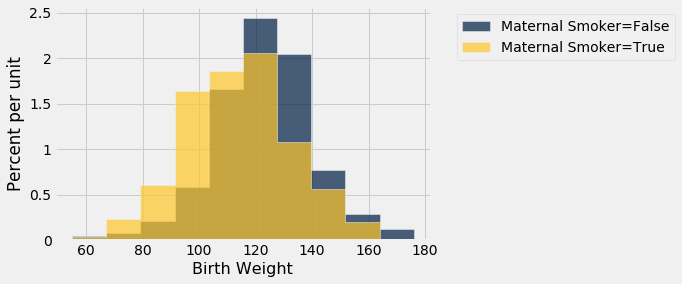

In [8]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

## A Test Statistic ##

In [10]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [11]:
means_table.column('Birth Weight average').item(1) - means_table.column('Birth Weight average').item(0)


-9.266142572024918

In [12]:
def difference_of_means(table, numerical_variable, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups"""
    
    #table with the two relevant columns
    reduced = table.select(numerical_variable, group_label) 
    
    # table containing group means
    grouped = reduced.group(group_label, np.average)

    # array of group means
    avg_label = numerical_variable + ' average'
    means = grouped.column(avg_label)
    
    return means.item(1) - means.item(0)

In [13]:
difference_of_means(births, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

### Shuffles: Simulation Under Null Hypothesis ###

In [14]:
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


In [16]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement=False).column('Maternal Smoker')
shuffled_labels

array([ True, False, False, ..., False, False, False])

In [17]:
original_and_shuffled = smoking_and_birthweight.with_columns('Shuffled Labels',
                                                            shuffled_labels)
original_and_shuffled

Birth Weight,Maternal Smoker,Shuffled Labels
120,False,True
113,False,False
128,True,False
108,True,False
136,False,False
138,False,True
132,False,True
120,False,False
143,True,False
140,False,False


In [18]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Shuffled Labels')

-0.50187851364322

In [19]:
difference_of_means(original_and_shuffled, 'Birth Weight', 'Maternal Smoker')

-9.266142572024918

### Permutation Test ###

In [20]:
def one_simulated_difference(table, numerical_variable, group_label):
    """Takes: name of table, column label of numerical variable,
    column label of group-label variable
    Returns: Difference of means of the two groups after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    
    # table of numerical variable and shuffled labels
    shuffled_table = table.with_columns('Shuffled Label', shuffled_labels)
    
    #return one value of the test stat

    return difference_of_means(shuffled_table, numerical_variable, 'Shuffled Label')

In [27]:
one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')

-1.14578362813657

In [29]:
differences = make_array()

for i in np.arange(2500):
    new_difference = one_simulated_difference(births, 'Birth Weight', 'Maternal Smoker')
    differences = np.append(differences, new_difference)

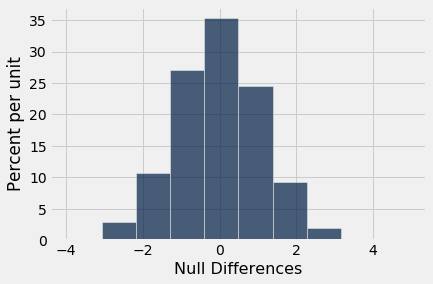

In [30]:
Table().with_column('Null Differences', differences).hist()